# K-Nearest Neighbor
This algorithm looks at the data points closest to the each data point and determines if they are the same class.  Changing the distance parameter/algorithm can give different results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

## LandSat Data

The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number. The Landsat satellite data is one of the many sources of information available for a scene. The interpretation of a scene by integrating spatial data of diverse types and resolutions including multispectral and radar data, maps indicating topography, land use etc. is expected to assume significant importance with the onset of an era characterised by integrative approaches to remote sensing (for example, NASA's Earth Observing System commencing this decade). Existing statistical methods are ill-equipped for handling such diverse data types. Note that this is not true for Landsat MSS data considered in isolation (as in this sample database). This data satisfies the important requirements of being numerical and at a single resolution, and standard maximum-likelihood classification performs very well. Consequently, for this data, it should be interesting to compare the performance of other methods against the statistical approach. One frame of Landsat MSS imagery consists of four digital images of the same scene in different spectral bands. Two of these are in the visible region (corresponding approximately to green and red regions of the visible spectrum) and two are in the (near) infra-red. Each pixel is a 8-bit binary word, with 0 corresponding to black and 255 to white. The spatial resolution of a pixel is about 80m x 80m. Each image contains 2340 x 3380 such pixels. The database is a (tiny) sub-area of a scene, consisting of 82 x 100 pixels. Each line of data corresponds to a 3x3 square neighbourhood of pixels completely contained within the 82x100 sub-area. Each line contains the pixel values in the four spectral bands (converted to ASCII) of each of the 9 pixels in the 3x3 neighbourhood and a number indicating the classification label of the central pixel. The number is a code for the following classes: Number Class 1 red soil 2 cotton crop 3 grey soil 4 damp grey soil 5 soil with vegetation stubble 6 mixture class (all types present) 7 very damp grey soil NB. There are no examples with class 6 in this dataset. The data is given in random order and certain lines of data have been removed so you cannot reconstruct the original image from this dataset. In each line of data the four spectral values for the top-left pixel are given first followed by the four spectral values for the top-middle pixel and then those for the top-right pixel, and so on with the pixels read out in sequence left-to-right and top-to-bottom. Thus, the four spectral values for the central pixel are given by attributes 17,18,19 and 20. If you like you can use only these four attributes, while ignoring the others. This avoids the problem which arises when a 3x3 neighbourhood straddles a boundary.


In [2]:
landsat_train = pd.read_csv("LandSat/sat.trn", sep=" ",header=None)

In [3]:
landsat_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36],
           dtype='int64')

I can't work with these column names. Based on my reading of the dataset, it appears that that each set of four numbers represent spectral values (R,G, Infrared1 and Infrared2).  The code below will create the column names I need for this data set by creating a Cartesian product of the pixel positions and the spectral values.

In [4]:
positions = ['top_left_','top_middle_','top_right_',
           'middle_left_','central_pixel_','middle_right_',
           'bottom_left_','bottom_middle_','bottom_right_']

In [5]:
pixels = ['r','g','infra1','infra2']

The product function gets the Cartesian product of two lists.

In [6]:
from itertools import product
temp = list(product(positions, pixels))

In [7]:
temp

[('top_left_', 'r'),
 ('top_left_', 'g'),
 ('top_left_', 'infra1'),
 ('top_left_', 'infra2'),
 ('top_middle_', 'r'),
 ('top_middle_', 'g'),
 ('top_middle_', 'infra1'),
 ('top_middle_', 'infra2'),
 ('top_right_', 'r'),
 ('top_right_', 'g'),
 ('top_right_', 'infra1'),
 ('top_right_', 'infra2'),
 ('middle_left_', 'r'),
 ('middle_left_', 'g'),
 ('middle_left_', 'infra1'),
 ('middle_left_', 'infra2'),
 ('central_pixel_', 'r'),
 ('central_pixel_', 'g'),
 ('central_pixel_', 'infra1'),
 ('central_pixel_', 'infra2'),
 ('middle_right_', 'r'),
 ('middle_right_', 'g'),
 ('middle_right_', 'infra1'),
 ('middle_right_', 'infra2'),
 ('bottom_left_', 'r'),
 ('bottom_left_', 'g'),
 ('bottom_left_', 'infra1'),
 ('bottom_left_', 'infra2'),
 ('bottom_middle_', 'r'),
 ('bottom_middle_', 'g'),
 ('bottom_middle_', 'infra1'),
 ('bottom_middle_', 'infra2'),
 ('bottom_right_', 'r'),
 ('bottom_right_', 'g'),
 ('bottom_right_', 'infra1'),
 ('bottom_right_', 'infra2')]

In [8]:
colnames = list()

In [9]:
for name in temp:
    colnames.append(name[0]+name[1])

colnames.append('land_type')

In [10]:
print(colnames)

['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2', 'land_type']


In [11]:
landsat_train.columns = colnames

In [12]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [13]:
landsat_train.to_csv('landsat_train.csv', index=False)

I going to put all of previous code into a function so I can apply it to the test data set.

In [14]:
def prep_data(df):
    positions = ['top_left_','top_middle_','top_right_',
           'middle_left_','central_pixel_','middle_right_',
           'bottom_left_','bottom_middle_','bottom_right_']
    
    pixels = ['r','g','infra1','infra2']
    
    temp = list(product(positions, pixels))
    
    colnames = list()
    
    for name in temp:
        colnames.append(name[0]+name[1])

    colnames.append('land_type')
    
    df.columns = colnames
    
    return df

Run the function on the landsat test data set.

In [15]:
temp = pd.read_csv("LandSat/sat.tst", sep=" ",header=None)
landsat_test = prep_data(temp)

In [16]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [17]:
landsat_test.to_csv('landsat_test.csv', index=False)

In [18]:
landsat_train.land_type.groupby(landsat_train.land_type).count()

land_type
1    1072
2     479
3     961
4     415
5     470
7    1038
Name: land_type, dtype: int64

For consistency, I will call my data sets X_train, y_train, X_test, and y_test.

In [19]:
binary_landsat_train = landsat_train.query("land_type==1 | land_type==3")
binary_landsat_test = landsat_train.query("land_type==1 | land_type==3")

In [20]:
X_train = np.array(binary_landsat_train.iloc[:,0:36])

In [21]:
X_train 

array([[ 92, 115, 120, ..., 107, 113,  87],
       [ 84, 102, 106, ...,  99, 104,  79],
       [ 84, 102, 102, ...,  99, 104,  79],
       ...,
       [ 64,  79,  96, ...,  91, 104,  92],
       [ 60,  83, 100, ...,  87, 108,  89],
       [ 64,  83, 104, ...,  83, 100,  85]])

In [22]:
y_train = np.array(binary_landsat_train.iloc[:,-1])

In [23]:
X_test = np.array(binary_landsat_test.iloc[:,0:36])
y_test = np.array(binary_landsat_test.iloc[:,-1])

Create and fit the model.

In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [25]:
neigh.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=3)

Get the predictions (based on X/y test data)

In [26]:
y_pred= neigh.predict(X_test)

In [27]:
neigh.score(X_test,y_test)

0.9940973930152484

We need to meaure the performance.

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
accuracy_score(y_pred, y_test)*100

99.40973930152484

Text(0.5, 24.0, 'Predicted Label')

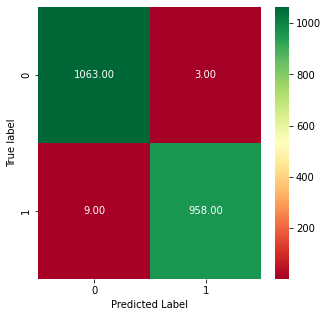

In [30]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(5,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

Precision
$$ p=\frac{tp}{tp+fp} $$

Recall
$$ r=\frac{tp}{tp+fn} $$

$$ F_{1} = 2 \times \frac{p \times r}{p + r} $$

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1066
           3       1.00      0.99      0.99       967

    accuracy                           0.99      2033
   macro avg       0.99      0.99      0.99      2033
weighted avg       0.99      0.99      0.99      2033



## Mushroom Data

In [32]:
mushroom = pd.read_csv("Mushroom/agaricus-lepiota.data", header=None)

In [33]:
mushroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The column names are not in the dataset. I need to get the column names so I can use them. I'm going to use Regular Expression to do this.

In [34]:
import re

This is the pattern to search for.

In [35]:
pattern="\d+.\s[a-z]+-?[a-z]+"

Read the file that contains the column names.

In [36]:
file = open('Mushroom/columns.txt', mode='r')
data = file.read()
file.close()

Search the text and place the matched data into a list.

In [37]:
x = re.findall(pattern, data)

In [38]:
colnames = list()

In [39]:
colnames.append('mushroom_type')
for name in x:
    colnames.append(re.sub("^\d+.\s", "", name))

In [40]:
colnames

['mushroom_type',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface',
 'stalk-surface',
 'stalk-color',
 'stalk-color',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print',
 'population',
 'habitat']

In [41]:
mushroom.columns = colnames

In [42]:
mushroom.head()

,mushroom_type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface,stalk-color,stalk-color,veil-type,veil-color,ring-number,ring-type,spore-print,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [43]:
mushroom.to_csv('mushroom.csv', index=False)

In [44]:
len(mushroom.columns)

23

In [45]:
len(mushroom)

8124

In [46]:
X = np.array(mushroom.iloc[:,1:22])
y = np.array(mushroom.iloc[:,0])

In [47]:
from sklearn import preprocessing

In [48]:
l = preprocessing.LabelEncoder()
y = l.fit_transform(y)

In [49]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [50]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [51]:
X = enc.fit_transform(X).toarray()

In [52]:
len(enc.get_feature_names())

110

In [57]:
mushroom_final = pd.DataFrame(data=X, columns=enc.get_feature_names())

In [58]:
mushroom_final['type'] = y

In [61]:
mushroom_final.to_csv("mushroom_final.csv", index=False)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

In [48]:
X_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [50]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
y_pred = neigh.predict(X_test)

In [52]:
neigh.score(X_test,y_test)

1.0

In [149]:
confusion_matrix(y_pred, y_test)

array([[846,   0],
       [  0, 779]])

Text(0.5, 24.0, 'Predicted Label')

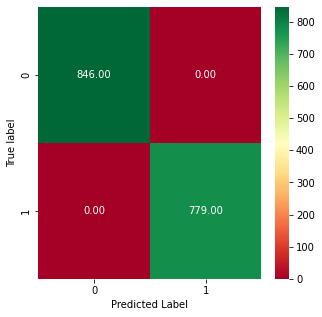

In [150]:
cm = confusion_matrix(y_pred, y_test)
fig = plt.figure(figsize=(5,5))
heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
plt.ylabel('True label')
plt.xlabel('Predicted Label')

In [152]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

